# Lab 1, image scaling

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Part 1. Image loading

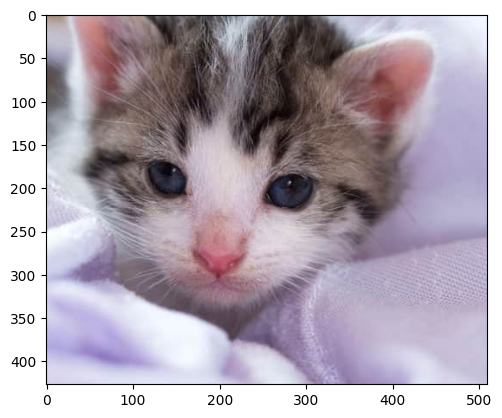

In [2]:
img = cv2.imread('src/cat_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Part 2. Image downscale

In [260]:
def image_downscale(img: np.ndarray, scale: int = 2) -> np.ndarray:
    # Downscales given image by a given positive scale,
    # the dimensions are preserved

    assert scale > 0
    
    # No scaling required
    if scale == 1:
        return img
    
    w, h, colors = img.shape
    
    # Wrappers around rounding functions for castign to integer
    int_round = lambda x: np.round(x).astype(np.int32) 
    int_floor = lambda x: np.floor(x).astype(np.int32) 
    int_ceil = lambda x: np.ceil(x).astype(np.int32)

    scaled_w, scaled_h = int_floor(w / scale), int_floor(h / scale)
    
    # Calculates neigbourhood of pixels to consider
    l_margin = d_margin = int_floor((scale-1) / 2)
    r_margin = u_margin = int_ceil((scale-1) / 2)
    
    new_img = np.zeros((scaled_w, scaled_h, colors), dtype=np.uint8)

    new_w_idx = 0
    new_h_idx = 0
    
    # Downscaling requires to abandon some pixels.
    # This amound strictly less than scale
    cropped_w, cropped_h = scaled_w*scale, scaled_h*scale
    print(f"Abandoned {w - cropped_w} pixels in width and {h - cropped_h} pixels in height")

    # Iterate over downscaled image
    for w_idx in np.arange(l_margin, cropped_w, r_margin+l_margin+1):
        for h_idx in np.arange(d_margin, cropped_h, u_margin+d_margin+1):
            # Averaging colours of neighbouring pixels
            new_img[new_w_idx, new_h_idx] = np.mean(
                img [
                    w_idx-l_margin : w_idx+r_margin, 
                    h_idx-d_margin : h_idx+u_margin
                ],
                dtype=np.uint64,     # np.uint8 will overflow, hence using bigger datatype
                axis=(0, 1)
            ).astype(np.uint8)      # casting back to pixel datatype    
            new_h_idx = new_h_idx + 1
             
        new_h_idx = 0
        new_w_idx = new_w_idx + 1

    return new_img

In [262]:
plt.imsave('src/small_img.jpg', image_upscale(img, scale=2))

![](src/small_img.jpg)

## Part 3. Image upscale

In [255]:
from collections.abc import Sequence

def image_upscale(img: np.ndarray, scale: int = 2) -> np.ndarray:
    # Upscales given image by a given positive scale,
    # the dimensions are preserved
    w, h, colors = img.shape
    
    scaled_w, scaled_h = w * scale, h * scale
    
    new_img = np.zeros((scaled_w, scaled_h, colors), dtype=np.uint8)

    new_w_idx = 0
    new_h_idx = 0
    
    # Iterating over pixels in the original image
    for img_col in img:
        for pxl in img_col:
            # Writing the same pixel inside window
            new_img[
                new_w_idx : new_w_idx+scale, 
                new_h_idx : new_h_idx+scale
            ] = pxl

            new_h_idx += scale 
        new_h_idx = 0
        new_w_idx += scale

    return new_img

In [256]:
plt.imsave('src/big_img.jpg', image_upscale(img, scale=2))

![](src/big_img.jpg)